## Linear Regression

It is one of the most basic regression techniques in which we want to model the relationship between a dependent variable y, and one or more independent variables X

The equation can be shown as below - <br>
#### y = w.X + b,
where w is the weight of the independent parameter X, if x is a d-dimensional vector, then w will also be a d-dimensional vector. Weight is responsible for the steep-ness of the regression line.<br>
b represents bias, which can thought of to be responsible for the shift in the modelled regression line. It is important to have a bias because weight cannot accomodate the shift. In simple terms, it is the intercept of the regression line.

We will be training the linear regression through gradient descent. One can solve for the parameters using closed-form solution (normal solution) of linear regressions too, which is given by:
#### w = (X<sup>T</sup>X)<sup>−1</sup>X<sup>T</sup>y
but, closed-form solutions have some disadvantages - <br>
1. Non-linear functions do not usually have closed-form solutions
2. Closed-form solutions requires computing the inverse. It gets [too slow](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent), when there are a lot of features 

### Training Steps
1. Initialize weight vector and bias with zero values (or very small numbers)
2. Calculate $\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $
3. Compute the cost $J(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
4. Compute partial derivatives of all the parameters <br>
$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$ <br>
$ \frac{\partial J}{\partial b} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$ <br>
The gradient can then be computed as follows: <br>
$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$ <br>
$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

5. Update the parameters using <br>
$w = w - \alpha \, \nabla_{\boldsymbol{w}} J$ <br>
$b = b - \alpha \, \nabla_{\boldsymbol{b}} J$

where, $\alpha$ is the learning rate

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(2018)

### Data

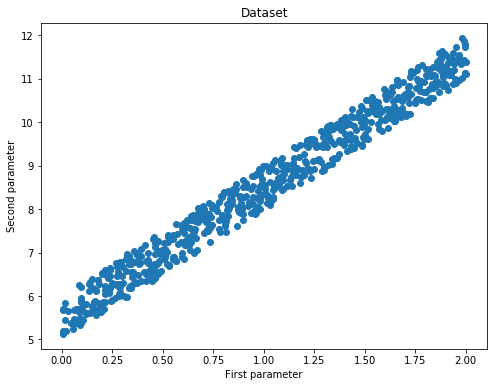

In [75]:
X = 2*np.random.rand(700, 1)
y = 5 + 3*X + np.random.rand(700, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First parameter")
plt.ylabel("Second parameter")
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of y_test is {}".format(y_test.shape))

Shape of X_train is (630, 1)
Shape of X_test is (70, 1)
Shape of y_train is (630, 1)
Shape of y_test is (70, 1)


In [77]:
class LinearRegression:
    def __init__(self):
        pass
    
    def train_gradient_descent(self, X, y, alpha=0.001, iterations=100):
#         Step 1: Initialize the parameters
        n_samples, n_features = X.shape
        self.w = np.zeros(shape=(n_features, 1))
        self.b = 0
        J = []
        
        for i in range(iterations):
#             Step 2: Calculate y_predicted
            y_hat = np.dot(X, self.w) + self.b
#             Step 3: Compute the cost
            cost = (1/n_samples)*np.sum((y_hat-y)**2)
            J.append(cost)
        
            if i % 100 == 0:
                print("Cost at iteration {} is: {}".format(i, cost))
                
#             Step 4: Compute partial derivatives
            dJ_dw = (2/n_samples)*np.dot(X.T, (y_hat-y))
            dJ_db = (2/n_samples)*np.sum((y_hat-y))
#             Step 5: Update the parameters
            self.w = self.w - alpha*dJ_dw
            self.b = self.b - alpha*dJ_db
        
        return self.w, self.b, J
    
    def normal_solution(self, X, y):
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.b = 0
        return self.w, self.b
    
    def predict(self, X):
        return (np.dot(X, self.w)) + self.b
    

Cost at iteration 0 is: 76.42034457690878
Cost at iteration 100 is: 1.5057708722979892
Cost at iteration 200 is: 0.5276919727643402
Cost at iteration 300 is: 0.40673713273134826
Cost at iteration 400 is: 0.3235832352517651
Cost at iteration 500 is: 0.2618782368519827


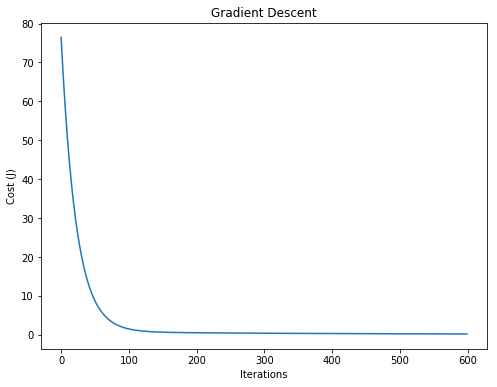

In [78]:
linear_regressor = LinearRegression()
w_trained, b_trained, J = linear_regressor.train_gradient_descent(X_train, y_train, alpha=0.005, iterations=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), J)
plt.title("Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.show()

In [79]:
y_hat_train = linear_regressor.predict(X_train)
y_hat_test = linear_regressor.predict(X_test)

error_train = (1/X_train.shape[0])*np.sum((y_hat_train-y_train)**2)
error_test = (1/X_test.shape[0])*np.sum((y_hat_test-y_test)**2)

print("Error on training set: {}".format(np.round(error_train)))
print("Error on testing set: {}".format(np.round(error_test)))

Error on training set: 0.0
Error on testing set: 0.0


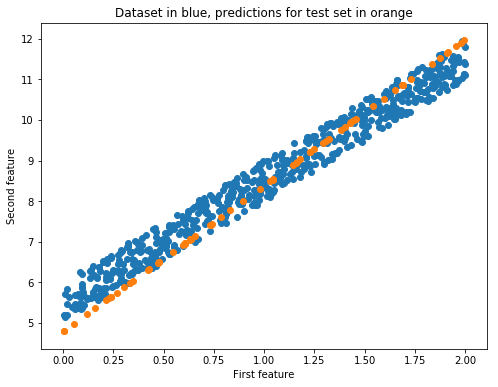

In [80]:
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_hat_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()